## <span style="color: #a9af90">1 | </span><span style="color: #586c5c">Information</span>

**Rice Classification Using CNN Models**

Rice, one of the most widely produced grains globally, has numerous genetic varieties distinguishable by features such as texture, shape, and color. These features not only separate rice varieties but also enable classification and quality evaluation of grains.

This study focuses on five rice varieties commonly grown in Turkey: Arborio, Basmati, Ipsala, Jasmine, and Karacadag. The dataset includes 75,000 images, with 15,000 samples for each variety.

A Convolutional Neural Network (CNN) model was developed to classify the rice varieties based on the image dataset. The model achieved an accuracy of **98%**, demonstrating its effectiveness in distinguishing between different rice types.

## <span style="color: #a9af90">2 | </span><span style="color: #586c5c">Libraries</span>

In [6]:
import os
import shutil
import random
import warnings
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

## <span style="color: #a9af90">3 | </span><span style="color: #586c5c">Creating DataFrame</span>

In [2]:
IMG_HEIGHT, IMG_WIDTH = 250, 250
BATCH_SIZE = 32
EPOCHS = 2
CATEGORIES = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]

In [3]:
base_path = "/Users/soroushesnaashari/Documents/Kaggle/Notebook 09. Rice Classification | CNN Using TensorFlow/Rice_Image_Dataset/"
organized_path = "/Users/soroushesnaashari/Documents/Kaggle/Notebook 09. Rice Classification | CNN Using TensorFlow/Rice_Image_Dataset/"
train_path = os.path.join(organized_path, "train")
val_path = os.path.join(organized_path, "validation")
test_path = os.path.join(organized_path, "test")

### <span style="color: #a9af90;">3.1 | </span><span style="color: #85937a">Organize dataset into train/val/test folders</span>

In [4]:
def organize_dataset(base_path, organized_path, split=(0.7, 0.15, 0.15)):
    if not os.path.exists(organized_path):
        os.makedirs(organized_path)
        os.makedirs(train_path)
        os.makedirs(val_path)
        os.makedirs(test_path)
        
    for category in CATEGORIES:
        category_path = os.path.join(base_path, category)
        images = os.listdir(category_path)
        random.shuffle(images)
        
        train_split = int(split[0] * len(images))
        val_split = int(split[1] * len(images)) + train_split
        
        train_images = images[:train_split]
        val_images = images[train_split:val_split]
        test_images = images[val_split:]
        
        for image in train_images:
            dest = os.path.join(train_path, category)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(os.path.join(category_path, image), dest)
        
        for image in val_images:
            dest = os.path.join(val_path, category)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(os.path.join(category_path, image), dest)
        
        for image in test_images:
            dest = os.path.join(test_path, category)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(os.path.join(category_path, image), dest)

organize_dataset(base_path, organized_path)

### <span style="color: #a9af90;">3.2 | </span><span style="color: #85937a">Create ImageDataGenerators</span>

In [5]:
data_gen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = data_gen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

validation_generator = data_gen.flow_from_directory(
    val_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = data_gen.flow_from_directory(
    test_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 74375 images belonging to 5 classes.
Found 35955 images belonging to 5 classes.
Found 35807 images belonging to 5 classes.


## <span style="color: #a9af90">4 | </span><span style="color: #586c5c">Build the CNN Model</span>

### <span style="color: #a9af90">4.1 | </span><span style="color: #85937a">Create CNN</span>

In [6]:
CNN = tf.keras.models.Sequential()

### <span style="color: #a9af90">4.2 | </span><span style="color: #85937a">Convolution</span>

In [7]:
CNN.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu', input_shape=[250, 250,3]))

/Users/soroushesnaashari/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### <span style="color: #a9af90">4.3 | </span><span style="color: #85937a">Pooling</span>

In [8]:
CNN.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### <span style="color: #a9af90">4.4 | </span><span style="color: #85937a">Flattening</span>

In [9]:
CNN.add(tf.keras.layers.Flatten())

### <span style="color: #a9af90">4.5 | </span><span style="color: #85937a">Full Connection</span>

In [10]:
CNN.add(tf.keras.layers.Dense(units=512,activation= 'relu'))

### <span style="color: #a9af90">4.6 | </span><span style="color: #85937a">Output Layer</span>

In [11]:
CNN.add(tf.keras.layers.Dense(units=5, activation='softmax'))

## <span style="color: #a9af90">5 | </span><span style="color: #586c5c">Training the CNN</span>

In [12]:
CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
CNN.fit(x=train_generator, validation_data= validation_generator, epochs=EPOCHS)

/Users/soroushesnaashari/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
2325/2325 ━━━━━━━━━━━━━━━━━━━━ 5769s 2s/step - accuracy: 0.9438 - loss: 0.3480 - val_accuracy: 0.9837 - val_loss: 0.0420
Epoch 2/2
2325/2325 ━━━━━━━━━━━━━━━━━━━━ 5968s 3s/step - accuracy: 0.9898 - loss: 0.0296 - val_accuracy: 0.9763 - val_loss: 0.0652


In [14]:
CNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   251,920,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 755,773,073 (2.82 GB)

 Trainable params: 251,924,357 (961.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 503,848,716 (1.88 GB)

### <span style="color: #a9af90">5.1 | </span><span style="color: #85937a">More Complicated</span>

Here there is another architecture where we have 3 neural networks (I wouldn't run it because of the runtime)

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(CATEGORIES), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/soroushesnaashari/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    13,779,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,872,965 (52.92 MB)

 Trainable params: 13,872,965 (52.92 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#history = model.fit(train_generator, epochs=EPOCHS,validation_data=validation_generator)

## <span style="color: #a9af90">6 | </span><span style="color: #586c5c">Evaluate the Model on Test Data</span>

In [16]:
test_loss, test_accuracy = CNN.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

1119/1119 ━━━━━━━━━━━━━━━━━━━━ 277s 247ms/step - accuracy: 0.9780 - loss: 0.0624
Test Accuracy: 0.98


The Accuracy is **98%** which is really great!

## <span style="color: #a9af90">7 | </span><span style="color: #586c5c">Save the model</span>

In [18]:
CNN.save("rice_classifier_model.h5")

## <span style="color: #a9af90">8 | </span><span style="color: #586c5c">Testing the Model</span>

In [7]:
model_path = "/Users/soroushesnaashari/Documents/Kaggle/Notebook 09. Rice Classification | CNN Using TensorFlow/rice_classifier_model.h5"
data_dir = "/Users/soroushesnaashari/Documents/Kaggle/Notebook 09. Rice Classification | CNN Using TensorFlow/Rice_Image_Dataset/"
categories = ["Arborio", "Basmati", "Ipsala", "Jasmine", "Karacadag"]
img_size = 250

model = load_model(model_path)

### <span style="color: #a9af90">8.1 | </span><span style="color: #85937a">Pick a random image</span>

In [8]:
def pick_random_image(data_dir, categories):
    random_category = random.choice(categories)
    category_path = os.path.join(data_dir, random_category)
    random_image = random.choice(os.listdir(category_path))
    image_path = os.path.join(category_path, random_image)
    return image_path, random_category

### <span style="color: #a9af90">8.2 | </span><span style="color: #85937a">Preprocess the image</span>

In [9]:
def preprocess_image(image_path, img_size):
    img = load_img(image_path, target_size=(img_size, img_size))
    img_array = img_to_array(img) / 250.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

### <span style="color: #a9af90">8.3 | </span><span style="color: #85937a">Predict and display results</span>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


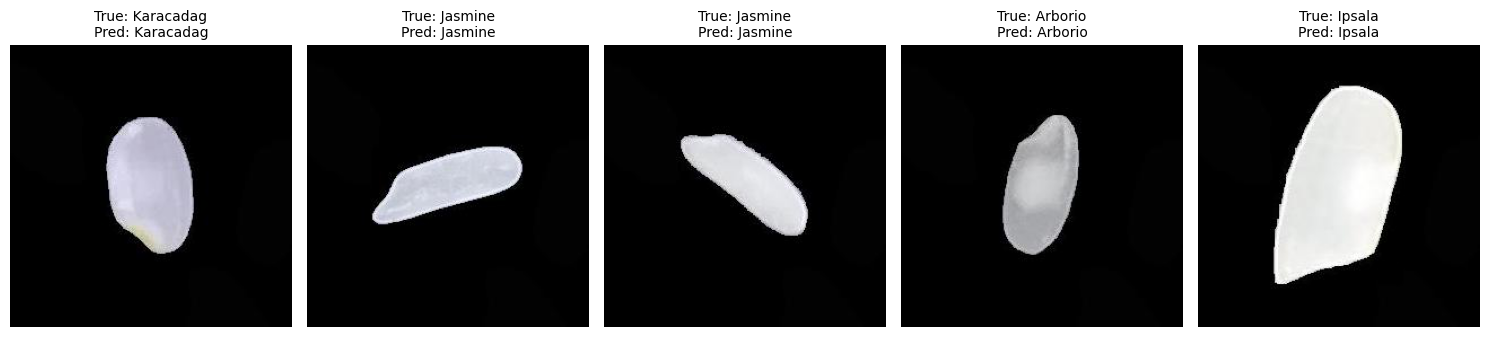

In [10]:
def display_predictions(data_dir, categories, model, img_size, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        image_path, true_label = pick_random_image(data_dir, categories)
        
        img_array = preprocess_image(image_path, img_size)
        
        prediction = model.predict(img_array)
        predicted_label = categories[np.argmax(prediction)]
        
        img = load_img(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10)

    plt.tight_layout()
    plt.show()

display_predictions(data_dir, categories, model, img_size, num_images=5)

# <span style="color: #85937a">The End!</span>
### <span style="color: #586c5c">Mohammad Soroush Esnaashari</span>